# FIFA 21 Player Data

⚽ Dataset: FIFA 21 Players

Skills: Sports analytics, data filtering, distributions

## Questions to answer:

    - Who are the top 10 rated players overall?

    - Plot the distribution of player ages.

    - Which club has the most players?

    - Which nationality has the highest average overall rating?

    - Compare average player value of defenders vs. forwards.

    - What’s the relationship between player rating and wage?

    - Which young players (under 21) have the highest potential?

    - Plot the top 5 countries with the most players.

    - Create a scatter plot of height vs. weight for players.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Get the data

fifa21 = pd.read_excel('data/Career Mode player datasets - FIFA 15-21.xlsx', sheet_name='FIFA 21')

# Save to csv

fifa21.to_csv('data/fifa21.csv')
print('Saved as a CSV file for the 21 Sheet')

Saved as a CSV file for the 21 Sheet


In [149]:
fifa21_data = pd.read_csv('data/fifa21.csv')
fifa21_data

,Unnamed: 0,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,18939,256679,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


In [10]:
columns = fifa21_data.columns
columns, len(columns)

(Index(['Unnamed: 0', 'sofifa_id', 'player_url', 'short_name', 'long_name',
        'age', 'dob', 'height_cm', 'weight_kg', 'nationality',
        ...
        'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
       dtype='object', length=107),
 107)

In [11]:
fifa21_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 107 entries, Unnamed: 0 to rb
dtypes: float64(18), int64(45), object(44)
memory usage: 15.5+ MB


In [12]:
fifa21_data.describe()

,Unnamed: 0,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,...,18944.000000,18944.000000,0.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,9471.500000,226242.402872,25.225823,181.190773,75.016892,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,...,48.050412,57.978674,NaN,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,5468.806085,27171.091056,4.697354,6.825672,7.057140,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,...,15.671721,12.118390,NaN,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,0.000000,41.000000,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,0.000000,...,6.000000,12.000000,NaN,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4735.750000,210030.500000,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,...,38.750000,50.000000,NaN,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9471.500000,232314.500000,25.000000,181.000000,75.000000,1.000000,66.000000,71.000000,6.500000e+05,3000.000000,...,49.000000,59.000000,NaN,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,14207.250000,246760.250000,29.000000,186.000000,80.000000,1.000000,70.000000,75.000000,1.800000e+06,7000.000000,...,60.000000,66.000000,NaN,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18943.000000,258970.000000,53.000000,206.000000,110.000000,4.000000,93.000000,95.000000,1.055000e+08,560000.000000,...,92.000000,96.000000,NaN,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


In [13]:
fifa21_data.isna().sum()

Unnamed: 0    0
sofifa_id     0
player_url    0
short_name    0
long_name     0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 107, dtype: int64

In [15]:
fifa21_data.shape

(18944, 107)

In [17]:
fifa21_data['age'].value_counts()

23    1473
22    1435
20    1427
24    1423
21    1383
26    1277
28    1274
25    1250
27    1217
29    1045
19    1032
30     935
31     768
18     668
32     628
33     476
34     359
17     273
35     218
36     160
37      81
38      57
16      29
39      28
40      13
41       7
42       5
43       2
53       1
Name: age, dtype: int64

In [30]:
fifa21_data.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3


In [31]:
fifa21_data.set_index('short_name', inplace=True)

In [33]:
fifa21_data.drop(columns=['sofifa_id'], inplace=True)

In [34]:
fifa21_data.head(4)

,player_url,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
short_name,,,,,,,,,,,,,,,,,,,,,
L. Messi,https://sofifa.com/player/158023/lionel-messi/...,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
Cristiano Ronaldo,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
J. Oblak,https://sofifa.com/player/200389/jan-oblak/210002,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
R. Lewandowski,https://sofifa.com/player/188545/robert-lewand...,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3


In [35]:
# calculate the BMI

fifa21_data['bmi'] = fifa21_data['weight_kg'] / ((fifa21_data['height_cm'] / 100)) ** 2
fifa21_data.head(4)

,player_url,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,bmi
short_name,,,,,,,,,,,,,,,,,,,,,
L. Messi,https://sofifa.com/player/158023/lionel-messi/...,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,24.913495
Cristiano Ronaldo,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,23.735308
J. Oblak,https://sofifa.com/player/200389/jan-oblak/210002,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,...,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,24.615211
R. Lewandowski,https://sofifa.com/player/188545/robert-lewand...,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,23.629490


In [45]:
avg_age = fifa21_data['age'].mean()
print('The average age is ', avg_age)
avg_height = fifa21_data['height_cm'].mean()
print('The average Height in CM is ', avg_height)
avg_weight = fifa21_data['weight_kg'].mean()
print('The average Height in KG is ', avg_weight)
avg_bmi = fifa21_data['bmi'].mean()
print('The average BMI is ', avg_bmi)

overall_avg = fifa21_data['overall'].mean()
print('The average Overall is ', overall_avg)

youngest_player = fifa21_data['age'].min()
print('The Youngest player is aged ', youngest_player)

oldest_player = fifa21_data['age'].max()
print('The oldest player is aged ', oldest_player)

The average age is  25.22582347972973
The average Height in CM is  181.19077280405406
The average Height in KG is  75.01689189189189
The average BMI is  22.82211601843613
The average Overall is  65.67778716216216
The Youngest player is aged  16
The oldest player is aged  53


In [42]:
fifa21_data['overall']

short_name
L. Messi             93
Cristiano Ronaldo    92
J. Oblak             91
R. Lewandowski       91
Neymar Jr            91
                     ..
K. Angulo            47
Zhang Mengxuan       47
Wang Zhenghao        47
Chen Zitong          47
Song Yue             47
Name: overall, Length: 18944, dtype: int64

In [46]:
import seaborn as sns

Text(0.5, 1.0, 'Overall')

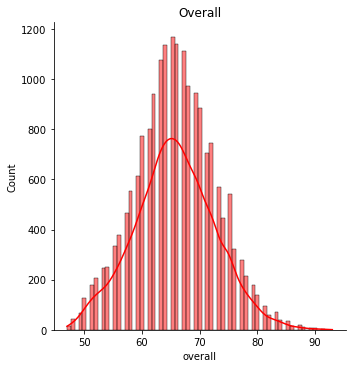

In [47]:
sns.displot(fifa21_data.overall, kde=True, color='r')
plt.title('Overall')

Text(0.5, 1.0, 'Age')

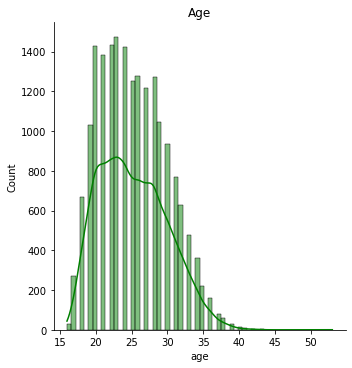

In [48]:
sns.displot(fifa21_data.age, kde=True, color='g')
plt.title('Age')

Text(0.5, 1.0, 'BMI')

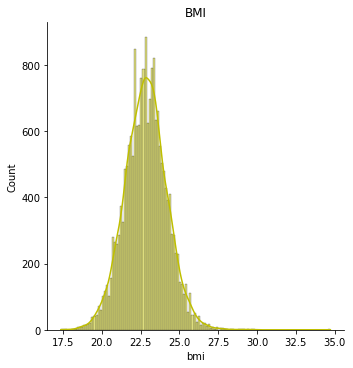

In [50]:
sns.displot(fifa21_data.bmi, kde=True, color='y')
plt.title('BMI')

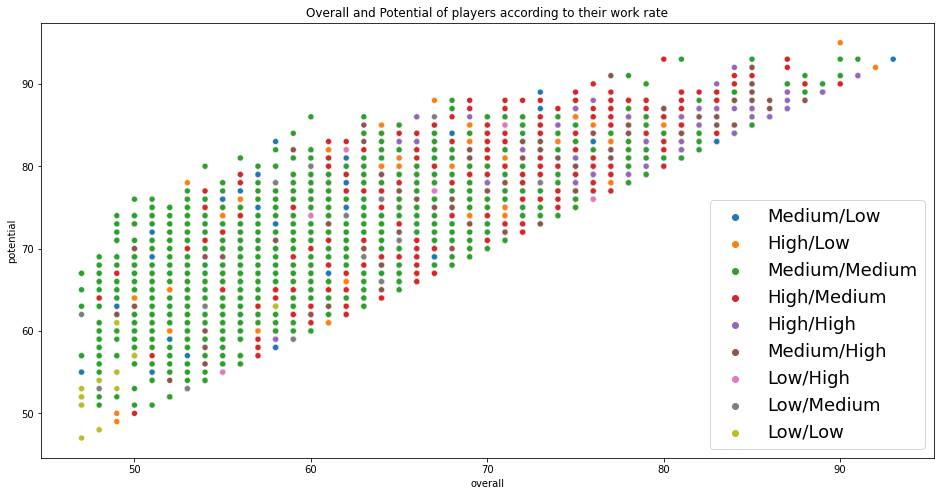

In [53]:
plt.figure(figsize=(16, 8))
plt.title('Overall and Potential of players according to their work rate')
sns.scatterplot(x='overall', y='potential', hue='work_rate', data=fifa21_data)
plt.legend(fontsize='18')

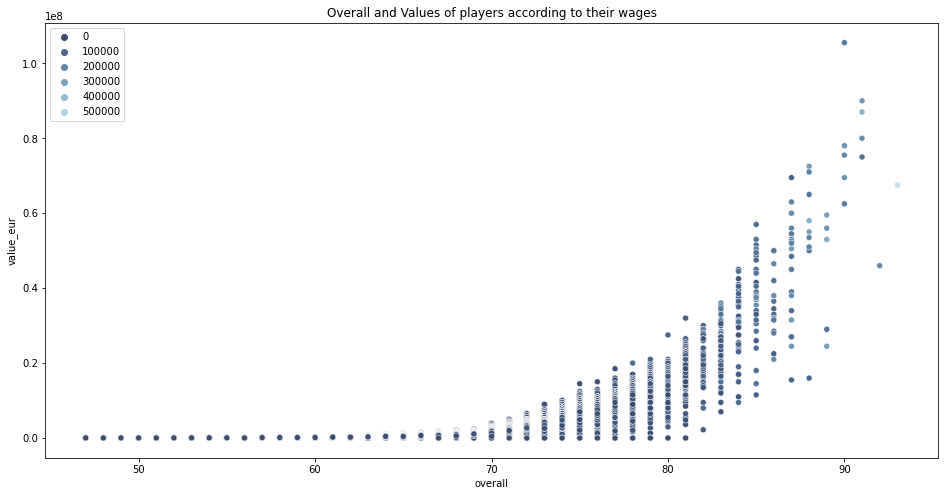

In [55]:
plt.figure(figsize=(16, 8))
plt.title('Overall and Values of players according to their wages')
sns.scatterplot(x='overall', 
                y='value_eur',
                hue='wage_eur', palette="ch:r=-.2,d=.3_r",
                data=fifa21_data,)
plt.legend(fontsize='10')

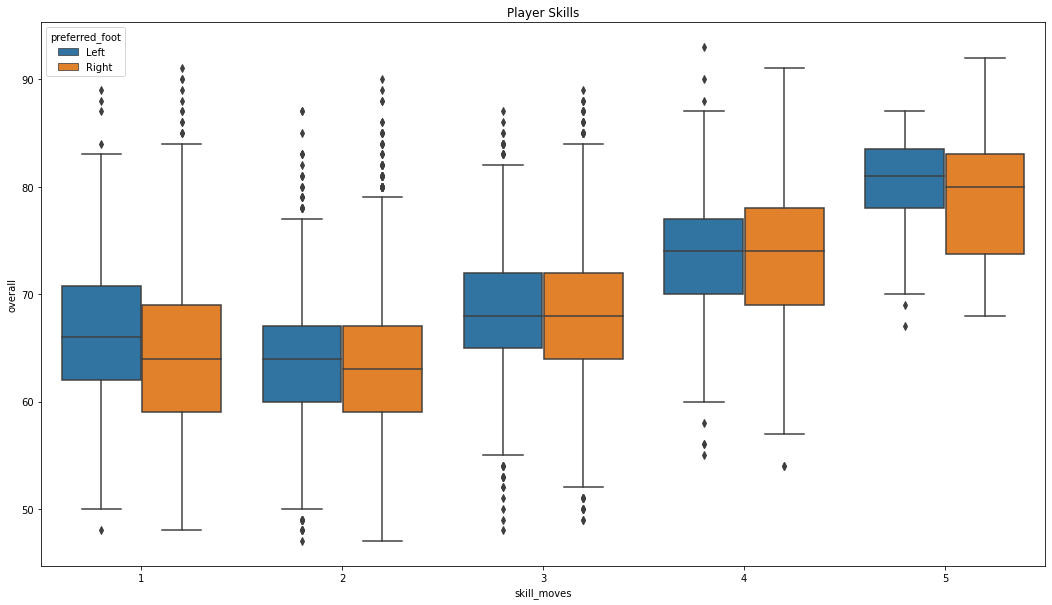

In [60]:
plt.figure(figsize=(18, 10))
plt.title("Player Skills")
sns.boxplot(y='overall',x='skill_moves',hue='preferred_foot',data=fifa21);

1. Who are the top 10 rated players overall?

In [93]:
top_players = fifa21_data.sort_values(by='overall', ascending=False).head(10)
top_players[["overall"]]

,overall
short_name,
L. Messi,93
Cristiano Ronaldo,92
J. Oblak,91
R. Lewandowski,91
Neymar Jr,91
K. De Bruyne,91
Alisson,90
S. Mané,90
M. Salah,90


In [82]:
[player for player in top_players.index]


['L. Messi',
 'Cristiano Ronaldo',
 'J. Oblak',
 'R. Lewandowski',
 'Neymar Jr',
 'K. De Bruyne',
 'Alisson',
 'S. Mané',
 'M. Salah',
 'V. van Dijk']

2. Plot the distribution of player ages.

Text(0.5, 1.0, 'Player Distribution by age')

<Figure size 1152x504 with 0 Axes>

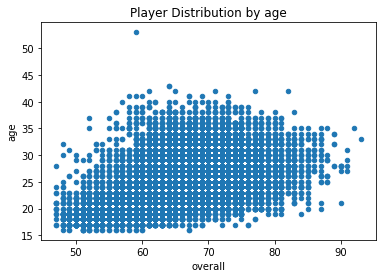

In [99]:
plt.figure(figsize=(16, 7))
fifa21_data.plot(kind='scatter', x='overall', y='age');
plt.title('Player Distribution by age')



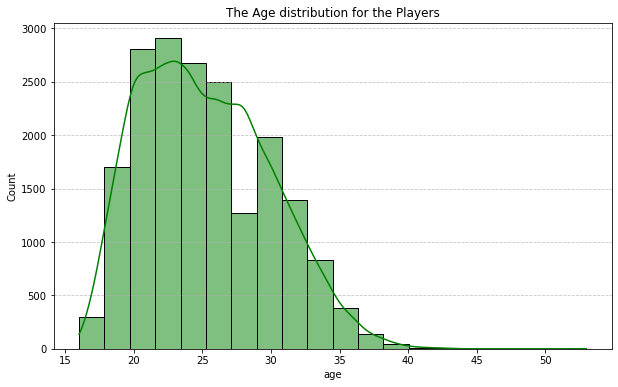

In [108]:
# Histogram

plt.figure(figsize=(10, 6))
sns.histplot(data=fifa21_data['age'], bins=20, kde=True, color='green')
plt.title('The Age distribution for the Players')
plt.grid(axis='y', linestyle='--', alpha=0.74)

Text(0, 0.5, 'Overall Rating')

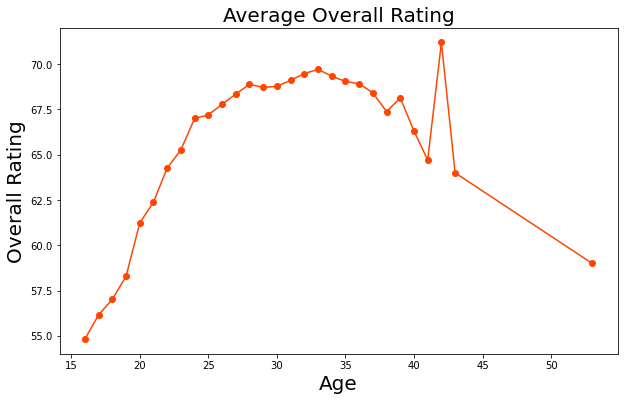

In [117]:
#  Average overall rating

avg_overal_rating_by_age = fifa21_data.groupby(by='age')['overall'].mean()
avg_overal_rating_by_age

# Plot

plt.figure(figsize=(10, 6))
avg_overal_rating_by_age.plot(kind='line', marker='o', color='orangered')
plt.title('Average Overall Rating', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Overall Rating', fontsize=20)

3. Which club has the most players?

In [118]:
fifa21_data.head(10)

,player_url,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,bmi
short_name,,,,,,,,,,,,,,,,,,,,,
L. Messi,https://sofifa.com/player/158023/lionel-messi/...,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,24.913495
Cristiano Ronaldo,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,23.735308
J. Oblak,https://sofifa.com/player/200389/jan-oblak/210002,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,...,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,24.615211
R. Lewandowski,https://sofifa.com/player/188545/robert-lewand...,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,23.629490
Neymar Jr,https://sofifa.com/player/190871/neymar-da-sil...,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,22.204082
K. De Bruyne,https://sofifa.com/player/192985/kevin-de-bruy...,Kevin De Bruyne,29,1991-06-28,181,70,Belgium,Manchester City,English Premier League,1.0,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21.366869
K. Mbappé,https://sofifa.com/player/231747/kylian-mbappe...,Kylian Mbappé Lottin,21,1998-12-20,178,73,France,Paris Saint-Germain,French Ligue 1,1.0,...,63+3,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3,23.040020
M. ter Stegen,https://sofifa.com/player/192448/marc-andre-te...,Marc-André ter Stegen,28,1992-04-30,187,85,Germany,FC Barcelona,Spain Primera Division,1.0,...,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3,24.307244
V. van Dijk,https://sofifa.com/player/203376/virgil-van-di...,Virgil van Dijk,28,1991-07-08,193,92,Netherlands,Liverpool,English Premier League,1.0,...,85+3,85+3,85+3,80+3,82+3,89+2,89+2,89+2,82+3,24.698650


In [120]:
fifa21_data['club_name'].value_counts().head(10)

FC Barcelona              33
Benevento                 33
Real Betis                33
Olympique de Marseille    33
Cádiz CF                  33
Levante UD                33
Crystal Palace            33
Newcastle United          33
Fulham                    33
LOSC Lille                33
Name: club_name, dtype: int64

4. Which nationality has the highest average overall rating?

In [121]:
fifa21_data.head(5)

,player_url,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,bmi
short_name,,,,,,,,,,,,,,,,,,,,,
L. Messi,https://sofifa.com/player/158023/lionel-messi/...,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,24.913495
Cristiano Ronaldo,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,23.735308
J. Oblak,https://sofifa.com/player/200389/jan-oblak/210002,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,...,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,24.615211
R. Lewandowski,https://sofifa.com/player/188545/robert-lewand...,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,23.629490
Neymar Jr,https://sofifa.com/player/190871/neymar-da-sil...,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,22.204082


In [127]:
nationality_grouped = fifa21_data.groupby(by='nationality')['overall'].mean()
nationality_grouped.sort_values(ascending=False).head(10)

nationality
Tanzania         76.000000
Chad             73.000000
Mozambique       72.200000
Bermuda          72.000000
Armenia          71.500000
Libya            71.250000
Egypt            71.172414
Puerto Rico      71.000000
New Caledonia    71.000000
Brazil           70.961669
Name: overall, dtype: float64

In [138]:
# Filtering out nationalities with very few players avoids skewed results.
nationality_counts = fifa21_data['nationality'].value_counts()
nationality_counts

# Keep only nationalities with at least 50 players
valid_nations = nationality_counts[nationality_counts >= 50].index
print('Valid Nations \n\n', valid_nations)

# Filter the Dataset
filtered_data = fifa21_data[fifa21_data['nationality'].isin(valid_nations)]

# Group by nationality and compute average overall rating
nationality_avg_rating = (
    filtered_data.groupby('nationality')['overall']
    .mean()
    .sort_values(ascending=False))

nationality_avg_rating.head(10)

Valid Nations 

 Index(['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Japan',
       'Netherlands', 'Italy', 'United States', 'Sweden', 'China PR', 'Norway',
       'Mexico', 'Poland', 'Portugal', 'Uruguay', 'Turkey', 'Korea Republic',
       'Colombia', 'Republic of Ireland', 'Romania', 'Austria', 'Saudi Arabia',
       'Denmark', 'Belgium', 'Scotland', 'Ecuador', 'Australia', 'Paraguay',
       'Switzerland', 'Venezuela', 'Chile', 'Peru', 'Bolivia', 'Croatia',
       'Serbia', 'Senegal', 'Nigeria', 'Wales', 'Ghana', 'Czech Republic',
       'Ivory Coast', 'Greece', 'Northern Ireland', 'Morocco', 'Canada',
       'Russia', 'Cameroon', 'South Africa', 'Slovakia', 'Bosnia Herzegovina',
       'DR Congo', 'Finland', 'Ukraine', 'Iceland', 'Slovenia', 'Algeria',
       'Mali'],
      dtype='object')


nationality
Brazil            70.961669
Ukraine           70.815385
Algeria           70.807692
Russia            70.207792
Czech Republic    69.864865
Portugal          69.804533
Morocco           69.750000
Croatia           69.318182
Spain             69.261194
Serbia            68.792308
Name: overall, dtype: float64

Text(0.5, 0, 'Nationality')

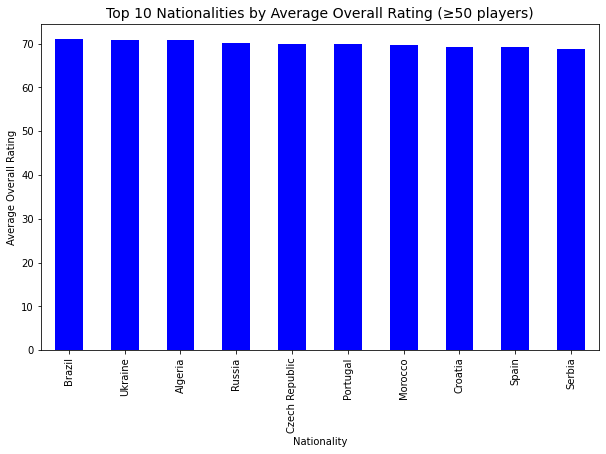

In [142]:
# bar
top10 = nationality_avg_rating.head(10)
plt.figure(figsize=(10, 6))
top10.plot(kind='bar', color='blue')
plt.title("Top 10 Nationalities by Average Overall Rating (≥50 players)", fontsize=14)
plt.ylabel("Average Overall Rating")
plt.xlabel('Nationality')

In [151]:
fifa21_data.head(3)

,Unnamed: 0,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,value_num
0,0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,0.0
1,1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,0.0
2,2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,...,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,0.0


5. Compare average player value of defenders vs. forwards.

In [ ]:
# Convert the fifa values to numeric
def value_to_numeric(value):
    if isinstance(value, str):
        value = value.replace('€', '')
        return float(eval(value))
    return 0.0


# Apply the conversion
fifa21_data['value_num'] = fifa21_data['value_eur'].apply(value_to_numeric)
fifa21_data.tail(4)

# Classify the positions

def position_group(pos):
    if pos in ['CB', 'LB', 'LCB', 'RB', 'RWB', 'RCB', 'RB']:
        return 'Defender'
    elif pos in ['ST', 'CF', 'LW', 'RW', 'LF', 'RF']:
        return 'Forward'
    else:
        return 'other'


fifa21_data['Role'] = fifa21_data['Pos']

,Unnamed: 0,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,value_num
18940,18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,...,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2,0.0
18941,18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,...,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2,0.0
18942,18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,...,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2,0.0
18943,18943,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,Yue Song,28,1991-11-20,185,79,China PR,...,47+0,47+0,47+0,47+0,47+0,46+1,46+1,46+1,47+0,0.0


In [152]:
fifa21_data['value_eur']

0        67500000
1        46000000
2        75000000
3        80000000
4        90000000
           ...   
18939       40000
18940       35000
18941       35000
18942       40000
18943       30000
Name: value_eur, Length: 18944, dtype: int64

In [153]:
fifa21_data.columns

Index(['Unnamed: 0', 'sofifa_id', 'player_url', 'short_name', 'long_name',
       'age', 'dob', 'height_cm', 'weight_kg', 'nationality',
       ...
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb',
       'value_num'],
      dtype='object', length=108)

In [ ]:
defender_positions = ["cb", "rb", "lb", "rcb", "lcb", "rwb", "lwb"]
forward_positions = ["st", "cf", "lw", "rw", "rf", "lf"]

# Classify players based on their strongest position

def classify_position(row):
    if row[defender_positions].max() > 0:
        return 'Defender'
    elif row[forward_positions].max() > 0:
        return 'Forward'
    else:
        return 'Other'
    
fifa21_data['role'] = fifa21_data.apply(classify_position, axis=1)

avg_value = fifa21_data.groupby('role')['value_eur'].mean().round(2)
print(avg_value)
# Plot comparison (Defenders vs Forwards only)
avg_value.loc[["Defender", "Forward"]].plot(
    kind="bar", color=["steelblue", "salmon"], edgecolor="black", figsize=(7,5)
)

plt.title("Average Player Value: Defenders vs. Forwards", fontsize=14)
plt.ylabel("Average Value (€)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

6. What’s the relationship between player rating and wage?

In [156]:
fifa21_data.columns

Index(['Unnamed: 0', 'sofifa_id', 'player_url', 'short_name', 'long_name',
       'age', 'dob', 'height_cm', 'weight_kg', 'nationality',
       ...
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb',
       'value_num'],
      dtype='object', length=108)

In [160]:
'wage_eur' in fifa21_data.columns

True

In [161]:
fifa21_data['wage_eur']

0        560000
1        220000
2        125000
3        240000
4        270000
          ...  
18939       500
18940      1000
18941      1000
18942      1000
18943      2000
Name: wage_eur, Length: 18944, dtype: int64

Correlation between overall rating and wage: 0.57


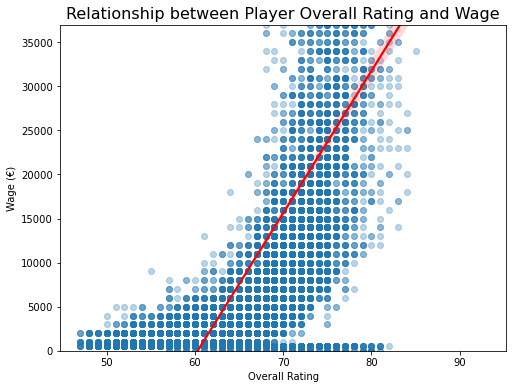

In [164]:
plt.figure(figsize=(8, 6))
sns.regplot(data=fifa21_data, x='overall',
            y=fifa21_data['wage_eur'],
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Relationship between Player Overall Rating and Wage', fontsize=16)
plt.xlabel('Overall Rating')
plt.ylabel('Wage (€)')
plt.ylim(0, fifa21_data['wage_eur'].quantile(0.95))  # Limit the outliers

# Correlation coefficient

correlation = fifa21_data['overall'].corr(fifa21_data['wage_eur'])
print(f"Correlation between overall rating and wage: {correlation:.2f}")

7. Which young players (under 21) have the highest potential?

In [ ]:
potential = fifa21_data['potential']
potential.head(5)

younger_players = fifa21_data[fifa21_data['age'] < 21]
younger_players.head(3)

# Sort by potential

top_younger_players = younger_players[
    ['short_name', 'long_name', 'age', 'club_name', 'nationality', 'potential']
    ].sort_values(
    by='potential', ascending=False).head(10)

top_younger_players

,short_name,long_name,age,club_name,nationality,potential
28,J. Sancho,Jadon Sancho,20,Borussia Dortmund,England,93
272,João Félix,João Félix Sequeira,20,Atlético Madrid,Portugal,93
366,Vinícius Jr.,Vinícius José Paixão de Oliveira Júnior,19,Real Madrid,Brazil,93
99,E. Haaland,Erling Haaland,19,Borussia Dortmund,Norway,92
64,M. de Ligt,Matthijs de Ligt,20,Juventus,Netherlands,92
683,Trincão,Francisco António Machado Mota Castro Trincão,20,FC Barcelona,Portugal,91
898,S. Tonali,Sandro Tonali,20,Milan,Italy,91
504,Rodrygo,Rodrygo Silva de Goes,19,Real Madrid,Brazil,90
1177,Ansu Fati,Anssumane Fati,17,FC Barcelona,Spain,90
2488,T. Almada,Thiago Ezequiel Almada,19,Vélez Sarsfield,Argentina,89


8. Plot the top 5 countries with the most players.

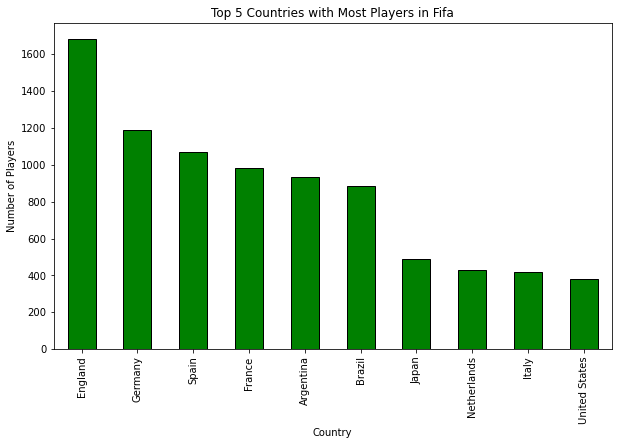

In [172]:
countries = fifa21_data['nationality'].value_counts().head(10)


# Plot

plt.figure(figsize=(10, 6))
countries.plot(kind='bar', color='green', edgecolor='black')

plt.title('Top 5 Countries with Most Players in Fifa')
plt.ylabel('Number of Players')
plt.xlabel('Country')
plt.show()

In [173]:
!pip install plotly

     |████████████████████████████████| 9.8 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 407 kB 2.2 MB/s eta 0:00:01


In [174]:
import plotly.express as px

# Count number of players per country

country_counts = fifa21_data['nationality'].value_counts().reset_index()
country_counts.columns = ['country', 'number_of_payers']

# Plot a world map

fig = px.choropleth(
    country_counts, locations='country', locationmode='country names', color='number_of_payers',
    hover_name='country', color_continuous_scale='Viridis', title='FIFA Players by Country'
)

fig.show()

/tmp/ipykernel_1473733/779261558.py:10: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [175]:
fifa21_data[fifa21_data['nationality'] == 'Kenya']

,Unnamed: 0,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,value_num
1402,1402,188942,https://sofifa.com/player/188942/victor-wanyam...,V. Wanyama,Victor Wanyama,29,1991-06-25,184,87,Kenya,...,75+1,75+1,75+1,70+2,70+2,78+,78+,78+,70+2,0.0
2210,2210,233119,https://sofifa.com/player/233119/michael-olung...,M. Olunga,Michael Olunga Ogada,26,1994-03-26,193,85,Kenya,...,47+2,47+2,47+2,47+2,45+2,47+2,47+2,47+2,45+2,0.0
6516,6516,253073,https://sofifa.com/player/253073/joseph-okumu/...,J. Okumu,Joseph Okumu,23,1997-05-26,193,75,Kenya,...,66+2,66+2,66+2,64+2,65+2,68+2,68+2,68+2,65+2,0.0
10526,10526,205609,https://sofifa.com/player/205609/johanna-omolo...,J. Omolo,Johanna Ochieng Omolo,30,1989-07-31,179,73,Kenya,...,64+1,64+1,64+1,59+2,60+2,65+0,65+0,65+0,60+2,0.0
11447,11447,255254,https://sofifa.com/player/255254/teddy-akumu-a...,T. Akumu Agay,Teddy Akumu Agay,27,1992-10-20,184,80,Kenya,...,63+2,63+2,63+2,60+2,62+2,64+2,64+2,64+2,62+2,0.0
12055,12055,237503,https://sofifa.com/player/237503/clarke-oduor/...,C. Oduor,Clarke Oduor,21,1999-06-25,176,70,Kenya,...,59+2,59+2,59+2,61+2,61+2,58+2,58+2,58+2,61+2,0.0
12244,12244,242684,https://sofifa.com/player/242684/handwalla-bwa...,H. Bwana,Handwalla Bwana,23,1997-06-25,175,66,Kenya,...,47+2,47+2,47+2,51+2,48+2,42+2,42+2,42+2,48+2,0.0
15863,15863,233665,https://sofifa.com/player/233665/jonah-ayunga/...,J. Ayunga,Jonah Ananias Paul Ayunga,23,1997-05-24,185,78,Kenya,...,42+2,42+2,42+2,47+2,45+2,42+2,42+2,42+2,45+2,0.0
16469,16469,254899,https://sofifa.com/player/254899/erick-otieno/...,E. Otieno,Erick Ouma Otieno,23,1996-09-27,168,70,Kenya,...,53+2,53+2,53+2,57+2,56+2,52+2,52+2,52+2,56+2,0.0
17678,17678,236444,https://sofifa.com/player/236444/henry-ochieng...,H. Ochieng,Henry Oliver Ochieng,21,1998-11-11,179,67,Kenya,...,54+2,54+2,54+2,52+2,52+2,52+2,52+2,52+2,52+2,0.0


9. Create a scatter plot of height vs. weight for players.

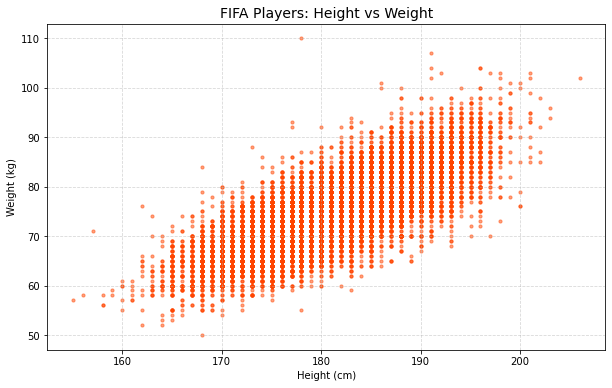

In [180]:
plt.figure(figsize=(10, 6))
plt.scatter(fifa21_data['height_cm'], fifa21_data['weight_kg'], alpha=0.5, color='orangered', s=10)
plt.title("FIFA Players: Height vs Weight", fontsize=14)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.grid(True, linestyle="--", alpha=0.5)
